In Google Colab, the code snippet utilizes the 'files' module from the 'google.Colab' library to permit document uploads. When executed, the 'files.Upload()' feature prompts the user to select a document from their local machine. Once selected, the file is uploaded to the Colab enviroment. The uploaded file(s) are then accesible in the notebook session. This functionality is especially beneficial for importing outside datasets or files required for analysis or processing inside the Colab surroundings.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Skyward_data.csv to Skyward_data.csv


In [ ]:
skyward_data = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
# Display basic dataset information
print("Dataset Info:\n")
skyward_data.info()
print("\nSample Data:\n", skyward_data.head())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    10

**Handling Duplicate Values**

Duplicate values arise where there are equal rows in the dataset, which can distort analysis consequences and result in biased conclusions. To cope with duplicates, we use the drop_duplicates() feature availed through the pandas library. This function identifies and gets rid of duplicate rows from the DataFrame, preserving the primary occurrence of each precise row. By doing away with duplicates, we make certain that every observation in the dataset is unique, preventing skewness in analysis effects.

**Handling Missing Values**

Missing values, additionally known as NaNs or null values, are common in datasets because of various reasons such as data collection errors or incomplete records. Missing values can adversely have an effect on analysis outcomes, and it is essential to address them appropriately. We first identify missing values within the dataset by the use of features like isnull() or info(), which offer a summary of missing values throughout columns. Depending on the volume and nature of missing values, we pick out the suitable strategy to deal with them. Common strategies include imputation (changing missing values with calculated values), deletion (eliminating rows or columns with lacking values), or superior strategies like interpolation. In this analysis we handle both missing and null values by dropping them. By correctly handling duplicate values and missing values, we preserve the integrity of the dataset, allowing correct and dependable analysis and insights.

In [5]:
#Handling missing values
missing_values_count = skyward_data.isnull().sum()
print("Missing Values Count:")
print(missing_values_count)
duplicates = skyward_data.duplicated().sum()
print("Duplicate Values Count:", duplicates)
skyward_data = skyward_data.drop_duplicates()
skyward_data.dropna(inplace=True)
print("\nCleaned DataFrame:")
print(skyward_data.head())

Missing Values Count:
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
Duplicate Values Count: 0

Cleaned DataFrame:
   Gender      Custome

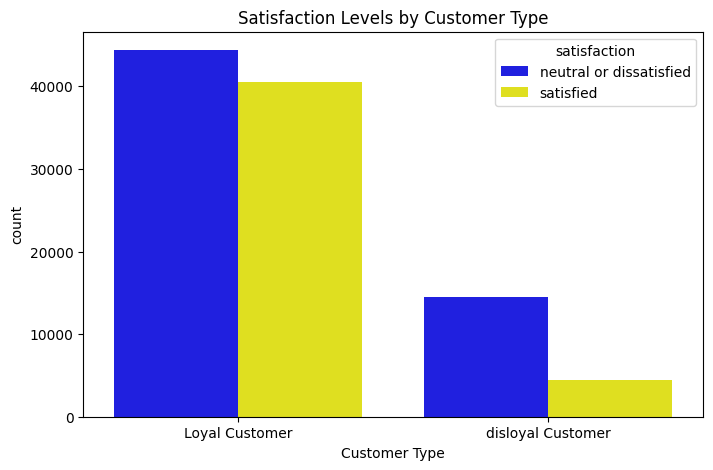

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=skyward_data, x='Customer Type', hue='satisfaction', palette=['blue', 'yellow'])
plt.title('Satisfaction Levels by Customer Type')
plt.show()

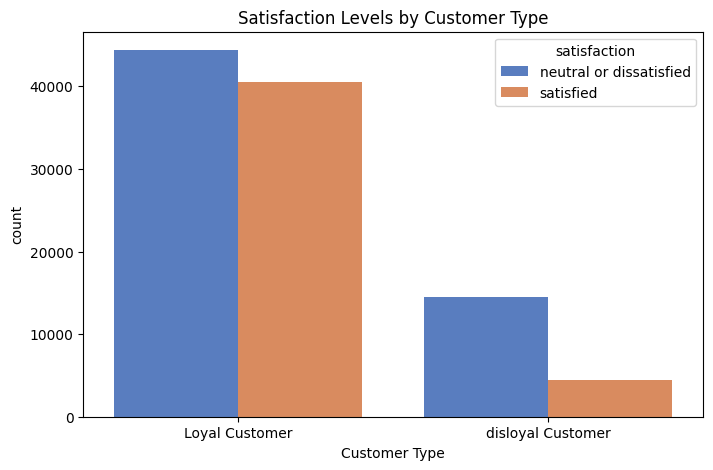

In [7]:
# 2. Customer Type Analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=skyward_data, x='Customer Type', hue='satisfaction', palette='muted')
plt.title('Satisfaction Levels by Customer Type')
plt.show()


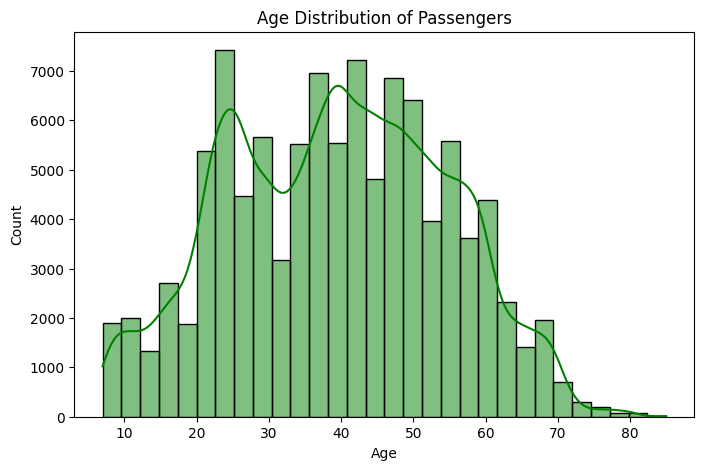

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=skyward_data, x='Age', bins=30, kde=True, color='green')
plt.title('Age Distribution of Passengers')
plt.show()


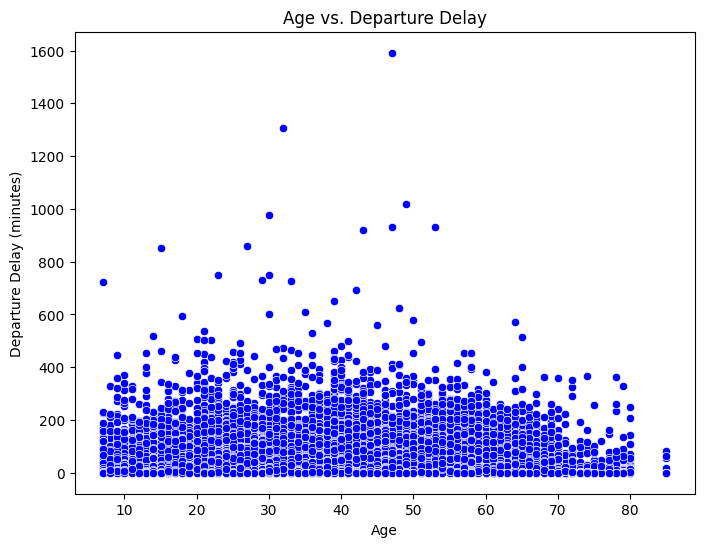

In [12]:
# Scatter plot of Age vs. Departure Delay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Departure Delay in Minutes', data=skyward_data, color='blue')
plt.title('Age vs. Departure Delay')
plt.xlabel('Age')
plt.ylabel('Departure Delay (minutes)')
plt.show()
